In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,mean_squared_error, classification_report, r2_score
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler




/Users/dikshya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dikshya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [54]:
df = pd.read_csv("master.csv")

In [55]:
df.shape

(344667, 15)

For the EDA section, refer to the links below:

1. https://www.kaggle.com/bnorbert/eda-walmart
2. https://www.kaggle.com/yepp2411/walmart-prediction-1-eda-with-time-and-space

In [56]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [57]:
df.IsHoliday = np.multiply(df.IsHoliday, 1)

In [58]:
df = pd.get_dummies(df, columns=["Type"])

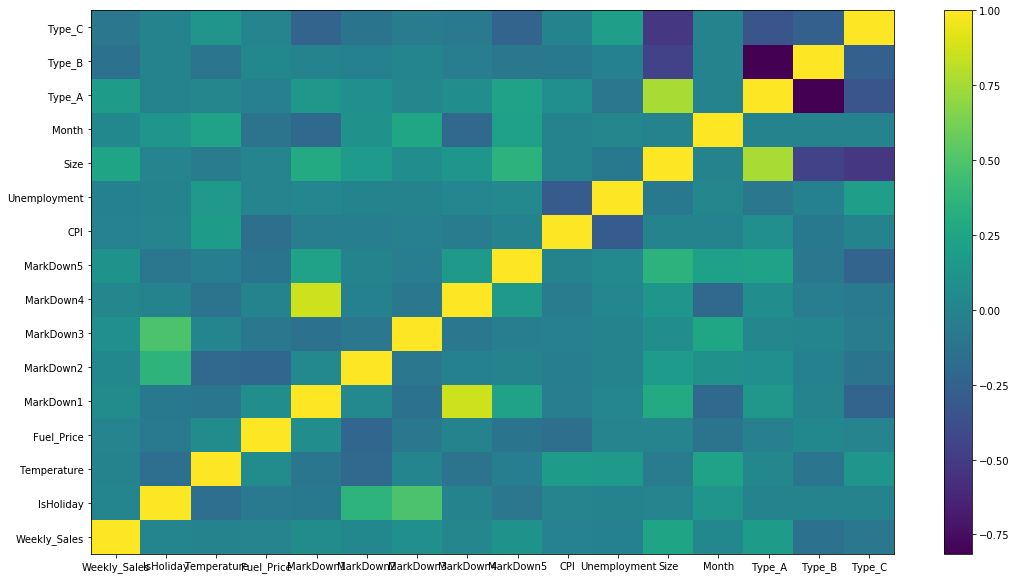

In [59]:
fig = plt.figure(figsize=(18, 10))
corr = df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [60]:
df0=pd.read_csv('master.csv')

In [61]:
df0=df0.fillna(0)

In [62]:
df0.isna().sum()

Store_Dept      0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [63]:
df0.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [64]:
X = df0.drop(columns=['Date','Store_Dept','Weekly_Sales','Type'])
y = df0[['Weekly_Sales']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [66]:
print("Linear Regression")
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE for LR: %.2f" %mean_squared_error(y_test,y_pred))
print("R2 score:%.2f"%r2_score(y_test,y_pred))


Linear Regression
MSE for LR: 484181845.82
R2 score:0.06


# imputed missing with 0(df1)

In [67]:
df1=df.fillna(0)

# part 1

## Regression(without CV df1)

In [71]:
X1 = df1.drop(columns=['Date','Store_Dept','Weekly_Sales','Fuel_Price','Type_A','MarkDown1'])
y1 = df1[['Weekly_Sales']]

In [72]:
print(X1.shape,y1.shape)

(344667, 12) (344667, 1)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [74]:
print("Linear Regression")
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE for LR: %.2f" %mean_squared_error(y_test,y_pred))
print("R2 score:%.2f"%r2_score(y_test,y_pred))


Linear Regression
MSE for LR: 482950946.10
R2 score:0.06


## regression with CV

In [75]:
#3 converting to numpy array
Xc = np.array(df1.drop(columns=['Date','Store_Dept','Weekly_Sales','Fuel_Price','Type_A','MarkDown1']).values)
yc = np.array(df1['Weekly_Sales'].values)

In [76]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:

print("Linear Regression")
#lr = LinearRegression()
cv_score = cross_validate(LinearRegression(),X= Xc,y =yc,scoring=['r2','neg_mean_squared_error'],cv=10,n_jobs=-1,verbose=2)


Linear Regression
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV] ................................................. , to

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [39]:
cv_score

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.33962798, 0.33613682, 0.48496318, 0.36747479, 0.38009095,
        0.32429218, 0.30056286, 0.26169515, 0.25163388, 0.21320486]),
 'score_time': array([0.00710511, 0.01081395, 0.0112381 , 0.00567603, 0.00444317,
        0.00359082, 0.00881791, 0.011379  , 0.00313306, 0.00171018]),
 'test_r2': array([ 0.06062323,  0.09644758, -0.03987665,  0.09292689,  0.03707407,
        -0.00798822,  0.0749831 , -0.00313   ,  0.00078536,  0.02858267]),
 'train_r2': array([0.05778405, 0.0582789 , 0.07226584, 0.05770993, 0.06459886,
        0.06888915, 0.06183838, 0.06759864, 0.06412779, 0.0645256 ]),
 'test_neg_mean_squared_error': array([-8.15407835e+08, -2.64268736e+08, -6.31378260e+08, -6.67545839e+08,
        -6.04521433e+08, -3.95108577e+08, -4.68372723e+08, -3.92247282e+08,
        -3.46589764e+08, -3.62359139e+08]),
 'train_neg_mean_squared_error': array([-4.53704548e+08, -5.14573753e+08, -4.74636504e+08, -4.69924339e+08,
        -4.76711378e+08, -4.99997643e+08, -4.91920639e

In [40]:
print(cv_score["test_r2"].mean())

0.03404280360197953


In [41]:
print(cv_score["test_neg_mean_squared_error"].mean())

-494779958.68962115


## Knn(without CV df1)

In [42]:
#print("KNN")
knn = KNeighborsRegressor()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("MSE for KNN: %.2f" %mean_squared_error(y_test,y_pred))
print("R2 score:%.2f"%r2_score(y_test,y_pred))


MSE for KNN: 564243813.41
R2 score:-0.09


## Knn with CV

In [77]:
print("KNN")
cv_score = cross_validate(KNeighborsRegressor(),X= X1,y =y1,scoring=['r2','neg_mean_squared_error'],cv=10,n_jobs=-1,verbose=2)


KNN
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total= 2.1min
[CV]  ................................................................
[CV] ................................................. , total= 2.7min
[CV]  ................................................................
[CV] ................................................. , total= 2.7min
[CV]  ................................................................
[CV] ................................................. , total= 2.8min
[CV]  ................................................................
[CV] ................................................. , total= 2.4min
[CV]  ................................................................
[C

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.6min finished


In [78]:
cv_score

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([155.49549007, 153.99161768, 122.02923179, 159.23686028,
        136.75932503, 157.31367207, 163.00216126, 162.78263092,
        119.80537271,  77.79974914]),
 'score_time': array([ 5.46407294,  5.1533103 ,  5.41115904,  7.13749886,  5.57630992,
        13.9982059 , 11.8091898 ,  6.69906616,  3.17293715,  3.51949477]),
 'test_r2': array([-0.05575462, -0.12999084, -0.70954071,  0.0315107 , -0.29335963,
        -0.28625875, -2.3065731 , -0.09867914, -0.96442533, -0.47938363]),
 'train_r2': array([-0.1446739 , -0.18868921, -0.17506483, -0.1376495 , -0.09920843,
        -0.14541754, -0.13637358, -0.30848897, -0.2317719 , -0.10123929]),
 'test_neg_mean_squared_error': array([-9.16427377e+08, -3.30496876e+08, -1.03797584e+09, -7.12744096e+08,
        -8.11966522e+08, -5.04184328e+08, -1.67424902e+09, -4.29609231e+08,
        -6.81384841e+08, -5.51841276e+08]),
 'train_neg_mean_squared_error': array([-5.51193976e+08, -6.49521681e+08, -6.01172933e+08, -5.67350973e+08,
      

In [79]:
print(cv_score["test_neg_mean_squared_error"].mean())

-765087941.1210355


In [80]:
print(cv_score["test_r2"].mean())

-0.5292455049986533


# Model Performance on test data

In [81]:
test_file=pd.read_csv("test.csv")

In [82]:
test_file[['Store','Dept']] = test_file.Store_Dept.str.split("_",expand=True)

In [83]:
test_file = pd.get_dummies(test_file, columns=["Type"])

In [84]:
test_file['Month'] = pd.to_datetime(test_file['Date']).dt.month

In [88]:
test_file.isna().sum()

Store_Dept      0
Weekly_Sales    0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Store           0
Dept            0
Type_A          0
Type_B          0
Type_C          0
Month           0
dtype: int64

In [100]:
test_file=test_file.fillna(0)

In [103]:
test_file.columns

Index(['Store_Dept', 'Weekly_Sales', 'Date', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Store', 'Dept', 'Type_A',
       'Type_B', 'Type_C', 'Month'],
      dtype='object')

In [113]:
X_final = test_file[['IsHoliday', 'Temperature', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Month', 'Type_B',
       'Type_C']]
y_final = test_file[['Weekly_Sales']]

In [114]:
print(X_final.shape,y_final.shape)

(76903, 12) (76903, 1)


In [115]:
y_final_pred = lr.predict(X_final)
print("MSE for LR: %.2f" %mean_squared_error(y_final,y_final_pred))


MSE for LR: 454821563.87


In [116]:
#print("KNN") on test_file
y_pred_final = knn.predict(X_final)
print("MSE for KNN: %.2f" %mean_squared_error(y_final,y_pred_final))



MSE for KNN: 522697740.58


# Part 2 Classifier

## Naive Bayes Classifier

In [117]:
dataset=pd.read_csv("master.csv")

In [118]:
dataset[['Store','Dept']] = dataset.Store_Dept.str.split("_",expand=True)

In [119]:
dataset.IsHoliday = np.multiply(dataset.IsHoliday, 1)

In [120]:
#dataset.info

In [121]:
dataset.isna().sum()

Store_Dept           0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270480
MarkDown2       278599
MarkDown3       276008
MarkDown4       278273
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Store                0
Dept                 0
dtype: int64

In [122]:
dataset.describe()

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,344667.000000,344667.000000,344667.000000,344667.000000,74187.000000,66068.000000,68659.000000,66394.000000,74529.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,0.077452,57.391070,3.278793,7377.990937,5520.011830,2812.494829,3867.350763,4841.675275,170.260421,8.119909,136807.198011
std,22859.611439,0.267307,18.644742,0.454502,9695.184239,11806.737391,13457.720905,8176.212908,5046.201077,38.767201,1.865077,60944.571069
min,-4988.940000,0.000000,-2.060000,2.472000,0.500000,-265.760000,-1.000000,0.460000,135.160000,126.064000,4.125000,34875.000000
25%,2100.335000,0.000000,43.820000,2.843000,1842.420000,96.520000,5.900000,319.840000,1844.030000,131.940807,7.082000,93638.000000
50%,7638.860000,0.000000,58.060000,3.263000,4879.040000,1053.980000,35.490000,1100.930000,3429.820000,182.238988,7.951000,140167.000000
75%,20179.490000,0.000000,71.240000,3.669000,9006.210000,5524.490000,203.990000,3380.280000,5996.690000,211.406287,8.622000,202505.000000
max,693099.360000,1.000000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000


In [123]:
dataset=dataset.fillna(0)

In [124]:
dataset.isna().sum()

Store_Dept      0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Store           0
Dept            0
dtype: int64

In [125]:
X2 = dataset.drop(columns=['Date','Store_Dept','Type'])
y2 = dataset[['Type']]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [127]:
#initialize your classifier
print("Naive-Bayes Classifier")
nb = BernoulliNB()

#fit your classifier to training set
nb = nb.fit(X_train, y_train)

Naive-Bayes Classifier


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
#use your classifier to predict on the test Set : X_test, save it to a temporary variable y_pred
y_pred = nb.predict(X_test)

In [129]:
#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test, y_pred , average="macro"))
#compute recall and f1-score

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.36
Recall:  0.33
F1-score:  0.23


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [130]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35211    76     0]
 [26664   120     0]
 [ 6843    20     0]]
             precision    recall  f1-score   support

          A       0.51      1.00      0.68     35287
          B       0.56      0.00      0.01     26784
          C       0.00      0.00      0.00      6863

avg / total       0.48      0.51      0.35     68934



/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
test2 = pd.read_csv("test.csv")
test2[['Store','Dept']] = test2.Store_Dept.str.split("_",expand=True)
test2.IsHoliday = np.multiply(test2.IsHoliday, 1)
test2.fillna(0,inplace=True)

In [137]:
x_test2 = test2.drop(columns=['Date','Store_Dept','Type'])
y_test2 = test2[['Type']]

In [138]:
y_pred2 = nb.predict(x_test2)

In [139]:
#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y_test2, y_pred2 , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test2, y_pred2 , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test2, y_pred2 , average="macro"))
#compute recall and f1-score

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.35
Recall:  0.33
F1-score:  0.23


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## decision trees

In [140]:
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Decision Tree Classifier


In [141]:
y_pred = clf.predict(X_test)
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test, y_pred , average="macro"))

Precision: 1.00
Recall:  1.00
F1-score:  1.00


In [142]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35287     0     0]
 [    0 26784     0]
 [    0     0  6863]]
             precision    recall  f1-score   support

          A       1.00      1.00      1.00     35287
          B       1.00      1.00      1.00     26784
          C       1.00      1.00      1.00      6863

avg / total       1.00      1.00      1.00     68934



In [143]:
y_pred2 = clf.predict(x_test2)

In [144]:
#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y_test2, y_pred2 , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test2, y_pred2 , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test2, y_pred2 , average="macro"))
#compute recall and f1-score

Precision: 1.00
Recall:  1.00
F1-score:  1.00


## Naive bayes with CV

In [145]:
print("Naive-Bayes Classifier")
nb = BernoulliNB()
#scores = cross_val_score(nb, X, y, cv=5, scoring=scoring)
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(nb, X2, y2, cv=10, scoring='precision_weighted').mean(), cross_val_score(nb, X2, y2, cv=10, scoring='precision_weighted').std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(nb, X2, y2, cv=10, scoring='recall_weighted').mean(), cross_val_score(nb, X2, y2, cv=10, scoring='recall_weighted').std() * 2))
print("F1-score: %0.2f (+/- %0.2f)" % (cross_val_score(nb, X2, y2, cv=10, scoring='f1_weighted').mean(), cross_val_score(nb, X2, y2, cv=10, scoring='f1_weighted').std() * 2))


Naive-Bayes Classifier


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  '

Precision: 0.46 (+/- 0.08)


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Recall: 0.51 (+/- 0.00)


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

F1-score: 0.35 (+/- 0.00)


/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree with CV

In [146]:
#Repeat the same steps for DecisionTree Classifier
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(clf, X2, y2, cv=10, scoring='precision_weighted').mean(), cross_val_score(clf, X2, y2, cv=10, scoring='precision_weighted').std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(clf, X2, y2, cv=10, scoring='recall_weighted').mean(), cross_val_score(clf, X2, y2, cv=10, scoring='recall_weighted').std() * 2))
print("F1-score: %0.2f (+/- %0.2f)" % (cross_val_score(clf, X2, y2, cv=10, scoring='f1_weighted').mean(), cross_val_score(clf, X2, y2, cv=10, scoring='f1_weighted').std() * 2))



Decision Tree Classifier
Precision: 0.98 (+/- 0.06)
Recall: 0.96 (+/- 0.17)
F1-score: 0.93 (+/- 0.14)


In [147]:
test2=pd.read_csv("test.csv")

In [148]:
test2[['Store','Dept']] = test2.Store_Dept.str.split("_",expand=True)

In [149]:
test2.IsHoliday = np.multiply(test2.IsHoliday, 1)

In [150]:
test2=test2.fillna(0)

In [151]:
test2.isna().sum()

Store_Dept      0
Weekly_Sales    0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Store           0
Dept            0
dtype: int64

In [153]:
test_X2 = test2.drop(columns=['Date','Store_Dept','Type'])
test_y2 = test2[['Type']]

# part 3

## Clustering

In [156]:
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [157]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

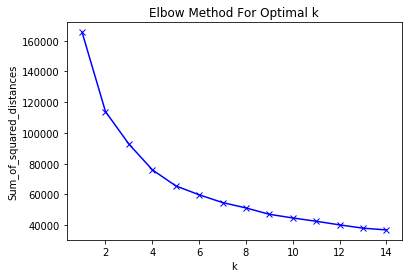

In [158]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

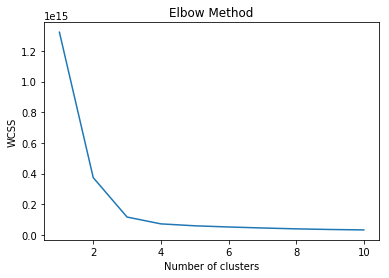

In [159]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
#optimal k - 2-6